In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from behav import plotting, utils, loading

import seaborn as sns
sns.set_style("whitegrid")

data_path = '/mnt/cube/RawData/Magpi/'

subjects = (
    ['B1520', 'B1535']
)

## Loads Data

In [2]:
%%time
behav_data = loading.load_data_pandas(subjects, data_path)

CPU times: user 866 ms, sys: 75.3 ms, total: 941 ms
Wall time: 1.08 s


In [3]:
behav_data['B1520'] = behav_data['B1520'][behav_data['B1520'].index > '2023-01-19 00:00:00.000000'] 
## B1520 started trials on the 19th, previous are debug trials

In [4]:
behav_data['B1535'] = behav_data['B1535'][behav_data['B1535'].index > '2023-01-20 00:00:00.000000'] 
## B1535 started trials on the 20th, previous are debug trials

## plot performance over past two weeks in calendar

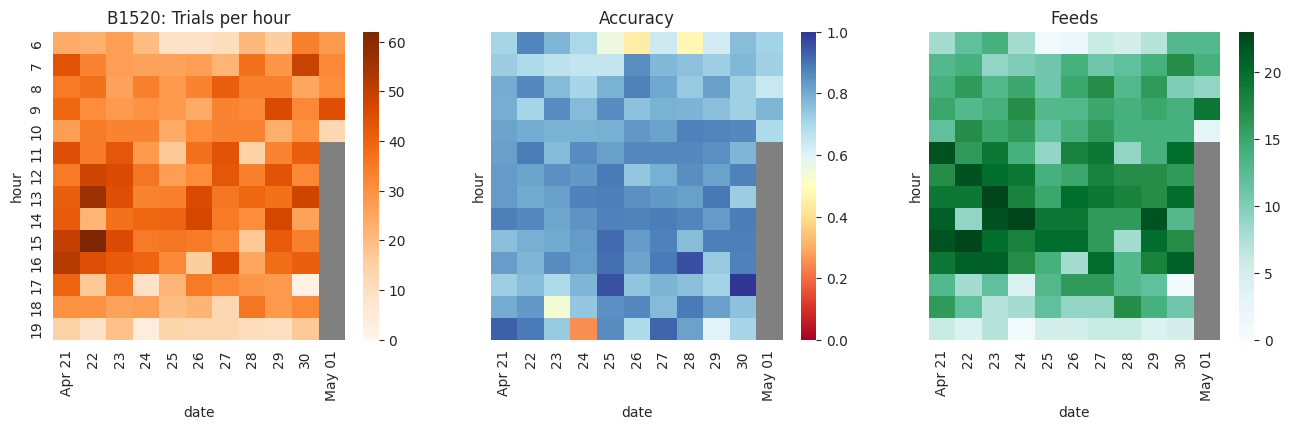

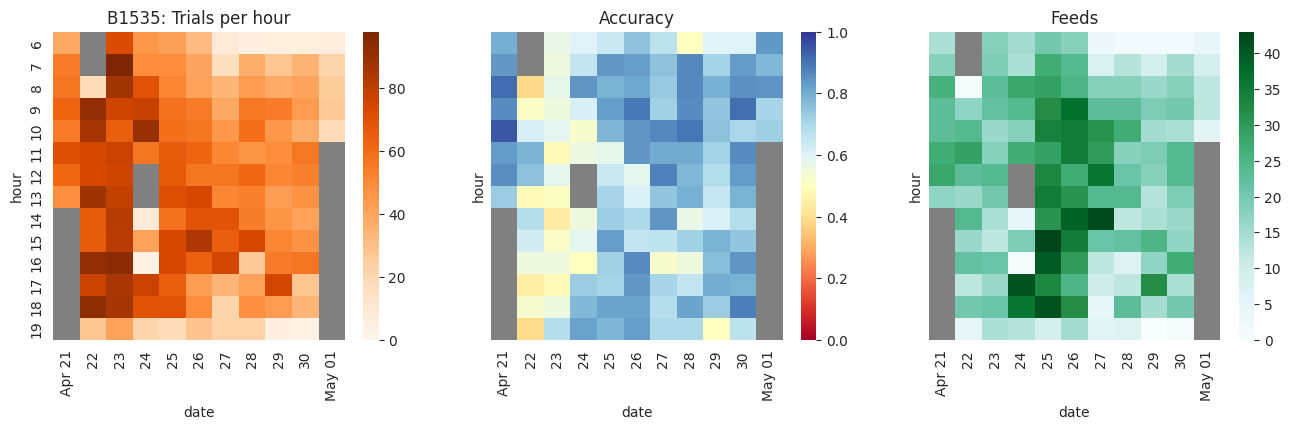

In [5]:
for subj,data in behav_data.items():
    pc_fig = plotting.plot_filtered_performance_calendar(subj, data, num_days=10)

## Plot percent correct by block with confidence bounds

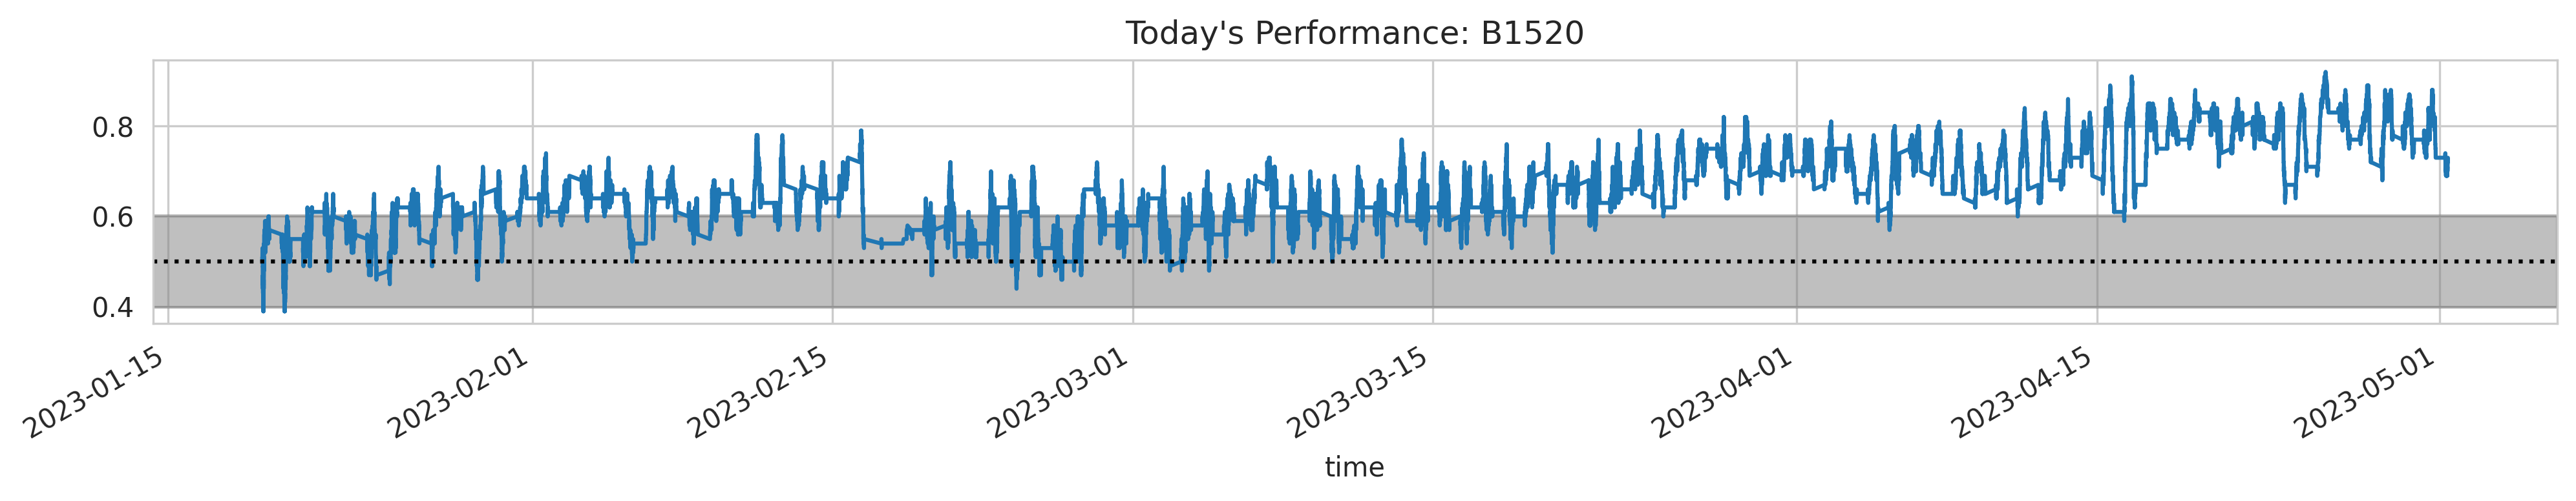

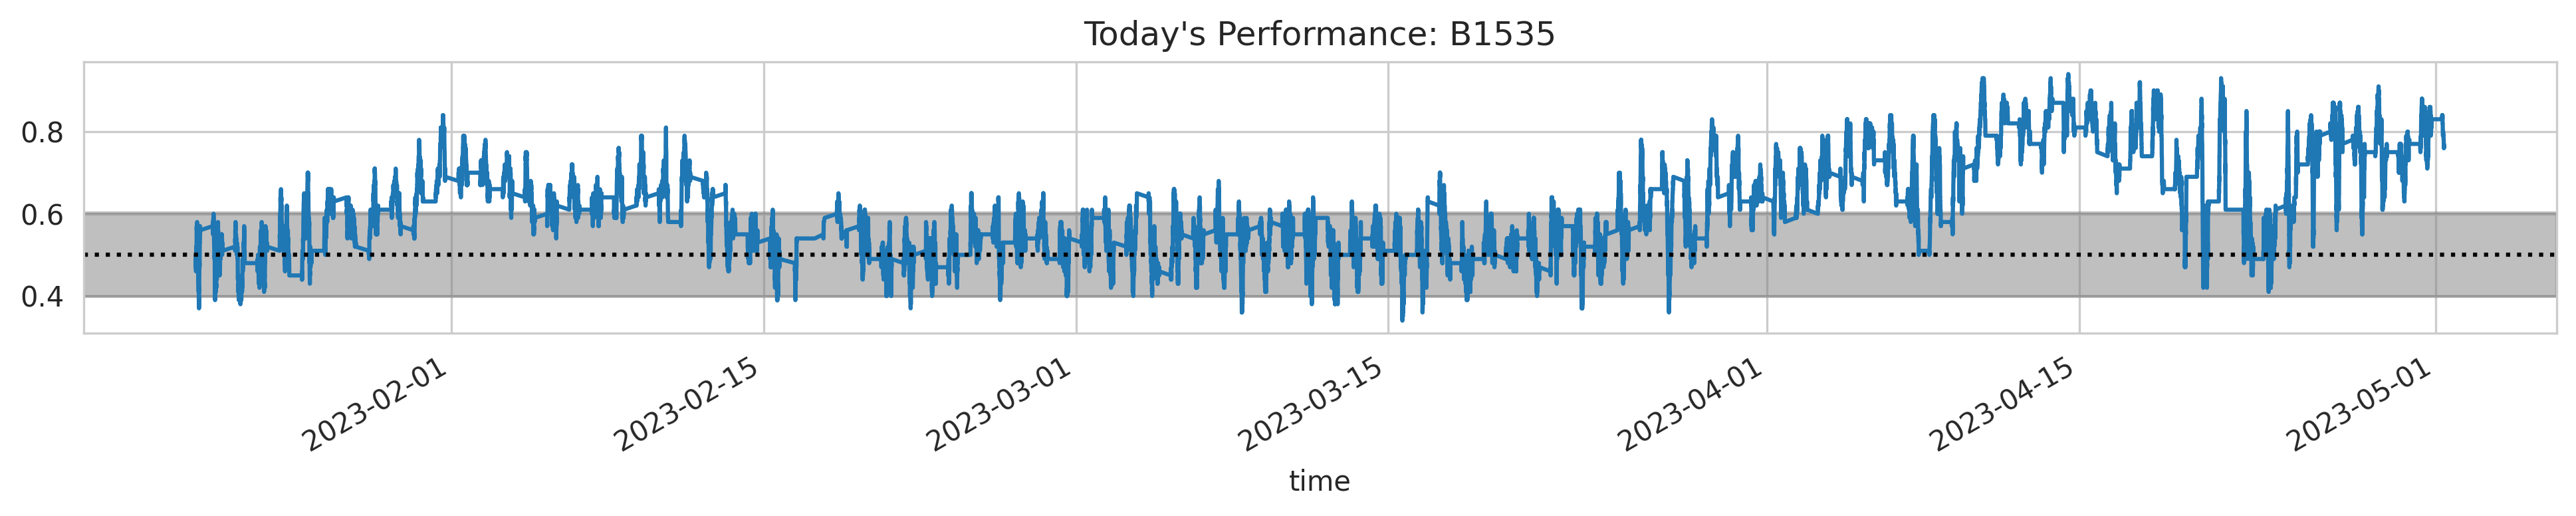

In [6]:
for subj,df in behav_data.items():
    ci_acc_fig =  plotting.plot_ci_accuracy(subj, df, day_lim=10000, bias = False)

### plot accuracy today

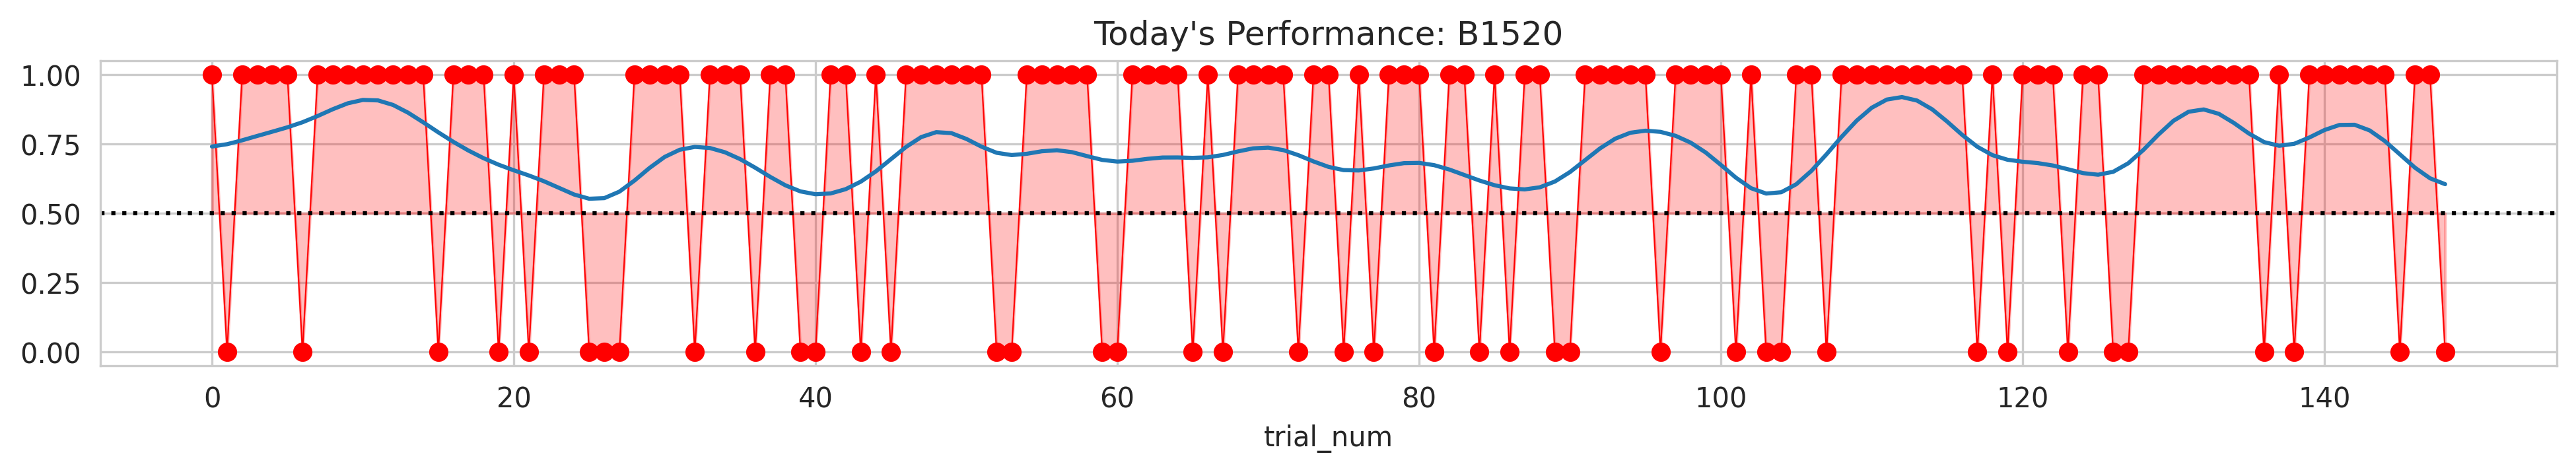

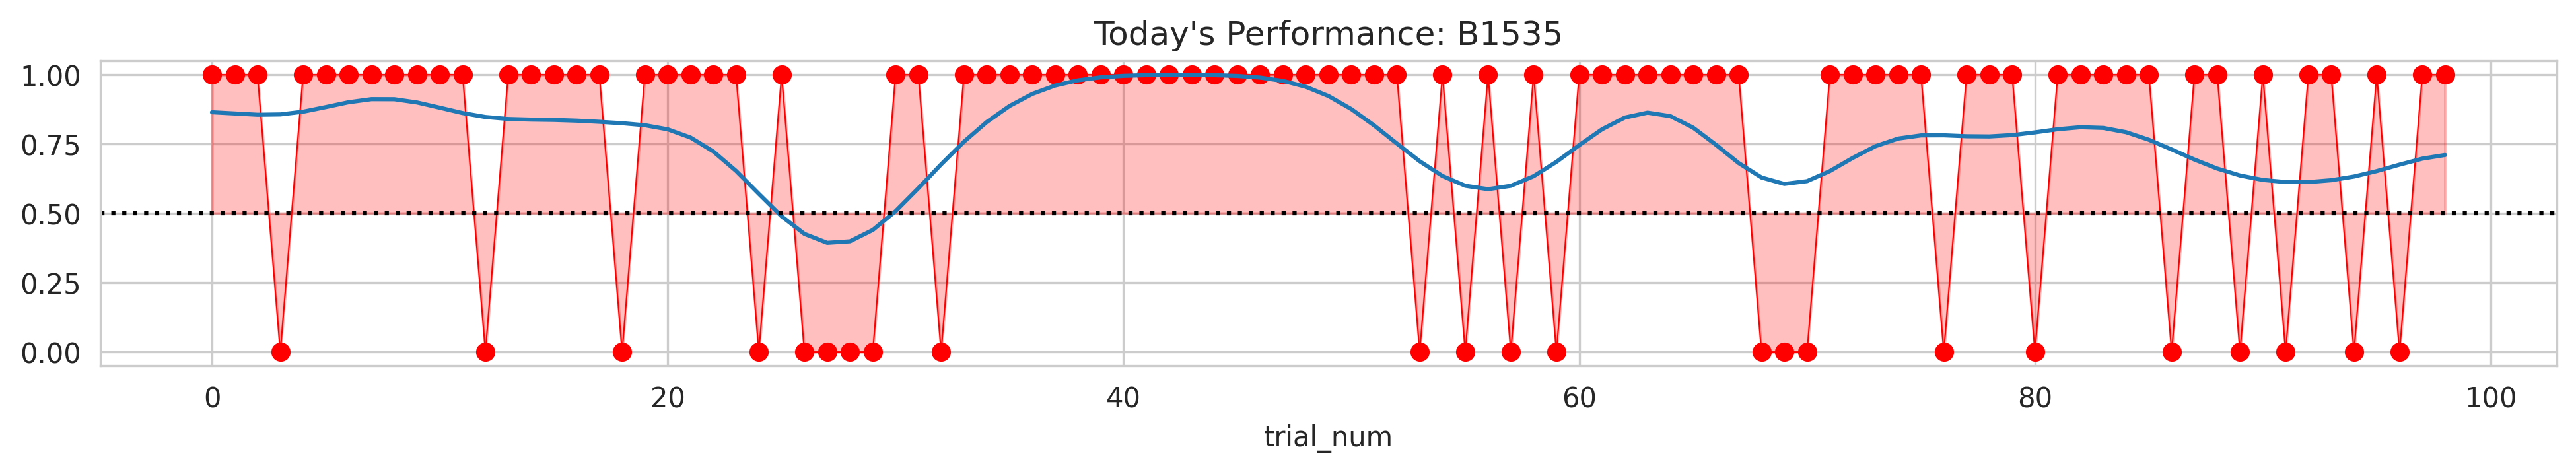

In [7]:
for subj,df in behav_data.items():
    daily_acc_fig = plotting.plot_daily_accuracy(subj, df, x_axis='trial_num')

# Plot number of trials and feeds for past week

/home/AD/j8xing/behav-analysis/behav/plotting.py:300: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(_date_labels(days))


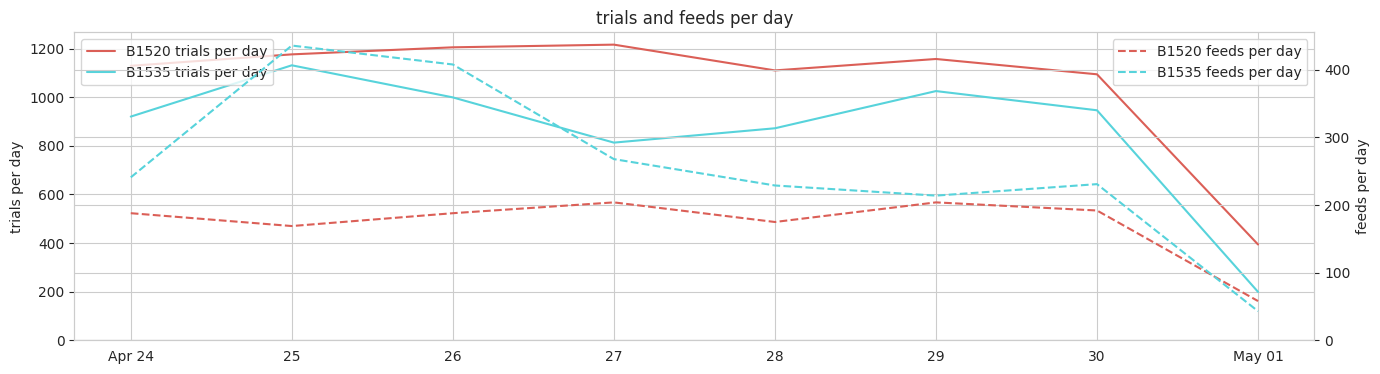

In [8]:
trial_feeds_fig = plotting.plot_trial_feeds(behav_data)

## Plot accuracy per stimuli

In [9]:
from matplotlib.pyplot import figure

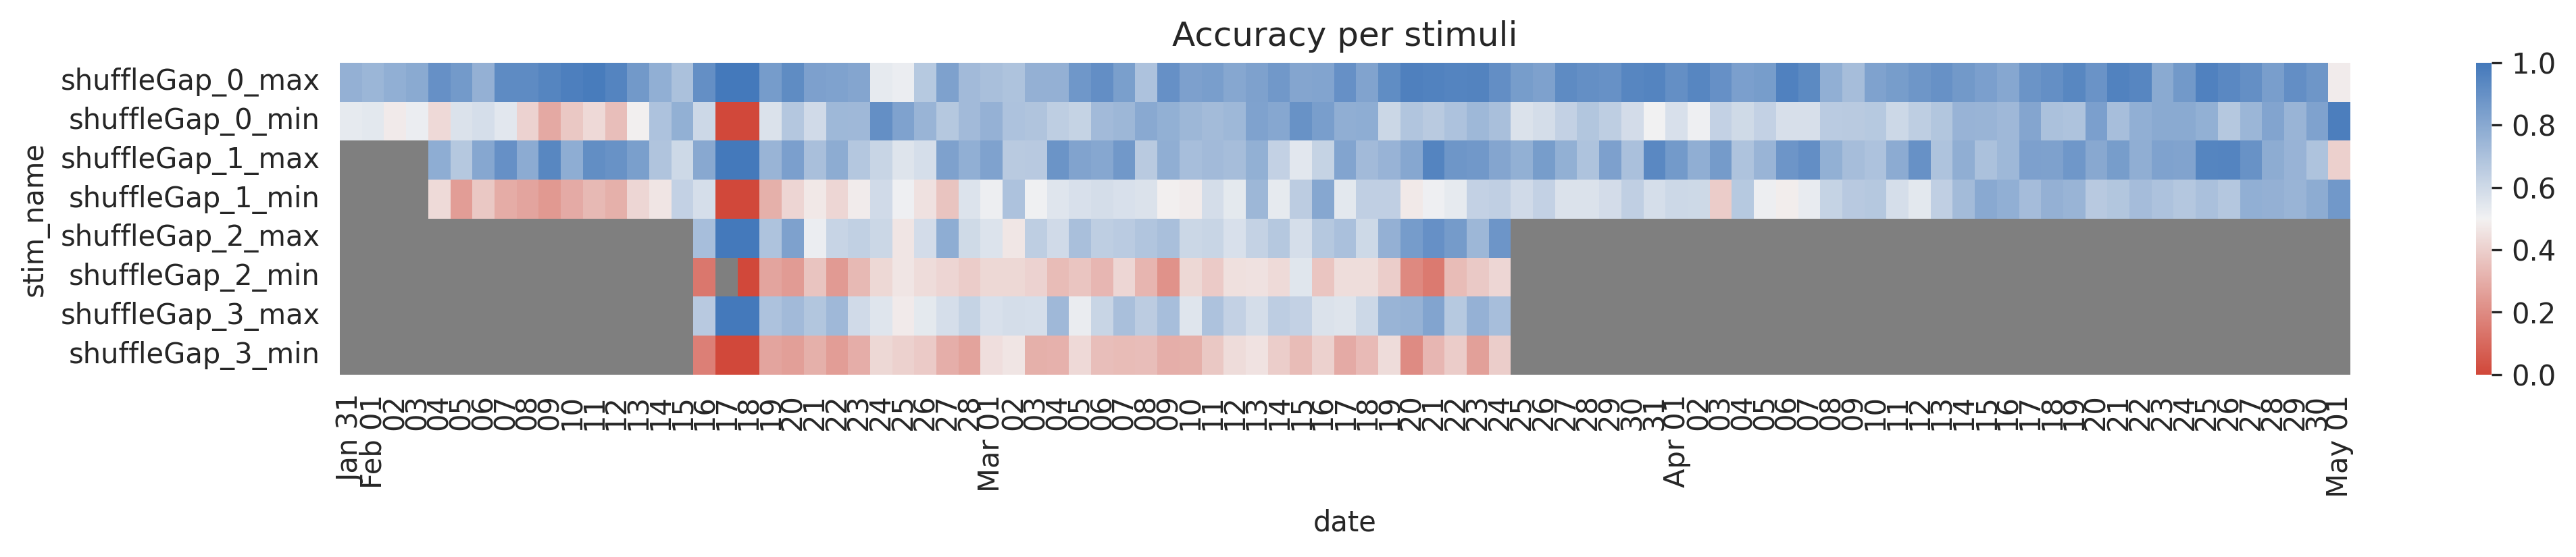

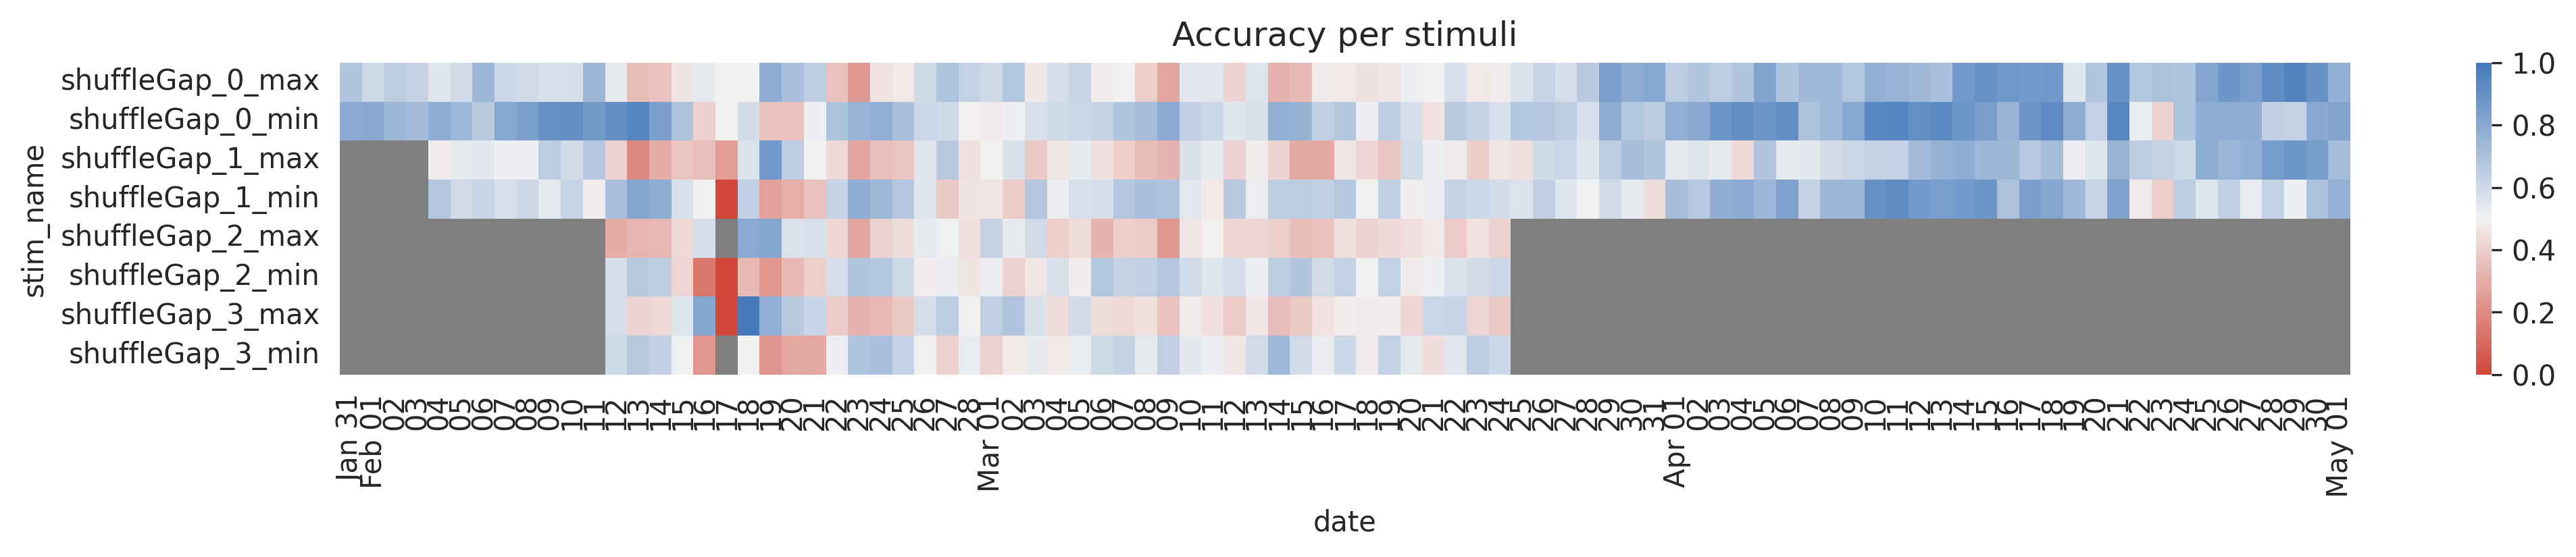

In [19]:
for subject in subjects: ## does this include correction trials?
    accperstim = plotting.plot_filtered_accperstim(title = 'Accuracy per stimuli', df = behav_data[subject], num_days = 90)